In [1]:
import pandas as pd
import numpy as np

In [6]:
gene_expression = pd.read_csv(
    "/data/g0017139/Set1/CCLE__Affy_hgu133plus2_QCed_mRNA_NoDuplicates_CleanedIdentifiers_RMA-sketch_genelevel_using_jetscore.txt",
    sep=None, engine='python', header=0,
)
gene_expression = gene_expression.T

In [239]:
eigenvectors = pd.read_csv("/home/g0017139/UMCG_Thesis/Working_Code/Results/Set2/eigenvec1.csv", index_col=0)
eigenvectors = eigenvectors.abs()
eigenvectors

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21
1,0.011436,0.014728,0.009285,0.003230,0.001885,0.002494,0.003033,0.006874,0.007997,0.003957,...,0.008653,0.003337,0.002934,0.001499,0.006645,0.001187,0.002592,0.000029,0.004767,0.001881
2,0.011596,0.003130,0.000203,0.003176,0.001113,0.001015,0.028326,0.004167,0.010019,0.012347,...,0.008386,0.000262,0.004603,0.006396,0.000261,0.009942,0.006512,0.000238,0.001030,0.005083
3,0.006118,0.008573,0.006172,0.002997,0.004916,0.001418,0.004540,0.013059,0.007126,0.000102,...,0.005275,0.005830,0.006594,0.002548,0.009671,0.012453,0.003937,0.000876,0.003363,0.003417
4,0.002515,0.001090,0.004871,0.008435,0.010324,0.003280,0.007843,0.001355,0.002517,0.000797,...,0.003914,0.004172,0.013571,0.008387,0.005811,0.007300,0.002474,0.004262,0.005516,0.007628
5,0.003583,0.002542,0.008186,0.001140,0.000275,0.001990,0.000170,0.003830,0.001615,0.009467,...,0.001072,0.000817,0.005433,0.003575,0.007517,0.002674,0.002280,0.006138,0.001611,0.000874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19631,0.005724,0.006331,0.003264,0.005508,0.000060,0.008392,0.010567,0.002956,0.012642,0.000929,...,0.009765,0.004833,0.001361,0.002800,0.004064,0.002951,0.001630,0.006687,0.003516,0.000941
19632,0.007887,0.006604,0.001041,0.006673,0.003227,0.008778,0.003783,0.001060,0.002885,0.002008,...,0.000237,0.000441,0.003402,0.000535,0.000066,0.005340,0.000613,0.001359,0.003639,0.005487
19633,0.000633,0.008990,0.006588,0.000069,0.019660,0.007641,0.025510,0.006271,0.010466,0.010173,...,0.002372,0.012593,0.001666,0.003082,0.004519,0.008336,0.000285,0.006708,0.013827,0.007439
19634,0.005521,0.000108,0.013611,0.004665,0.007648,0.008640,0.003925,0.005897,0.009382,0.000562,...,0.005359,0.002980,0.009061,0.016363,0.010269,0.000197,0.000514,0.002971,0.006519,0.007717


In [240]:
GPL570 = pd.read_parquet("/data/g0017139/GPL570_clean.parquet")

In [241]:
GPL570.columns = [int(x) for x in GPL570.columns]

In [242]:
mapping = dict(zip(GPL570.columns, eigenvectors.sum(axis=1).values))

In [243]:
Entrez_Map = pd.read_csv('/data/g0017139/Set1/Entrezid_mapping_using_org_Hs_eg_db_03052021.txt',
                               sep=None, engine='python', header=0,
)
Entrez_Map.sort_values(['CHR_Mapping', 'BP_Mapping'], axis=0, inplace=True)
Entrez_Map.head()

,mapped_entrez_v1,CHR_Mapping,BP_startloc,BP_endloc,sense_or_antisense,GENENAME,SYMBOL,BP_Mapping
1,653635,1,14361.0,29370.0,-1,"WASP family homolog 7, pseudogene",WASH7P,21865.5
11,79501,1,69090.0,70008.0,1,olfactory receptor family 4 subfamily F member 5,OR4F5,69549.0
128,100132287,1,490755.0,495445.0,-1,uncharacterized LOC100132287,LOC100132287,493100.0
150,729759,1,568227.0,569166.0,-1,olfactory receptor family 4 subfamily F member 29,OR4F29,568696.5
168,101928626,1,627379.0,629009.0,-1,uncharacterized LOC101928626,LOC101928626,628194.0


In [244]:
Entrez_Map['Weight'] = Entrez_Map['mapped_entrez_v1'].map(mapping)
Entrez_Map['mapped_entrez_v1'] = Entrez_Map['mapped_entrez_v1'].astype(str)

In [245]:
Entrez_Map = Entrez_Map.dropna()

In [246]:
Entrez_Map = Entrez_Map.sort_values('Weight', ascending=False)

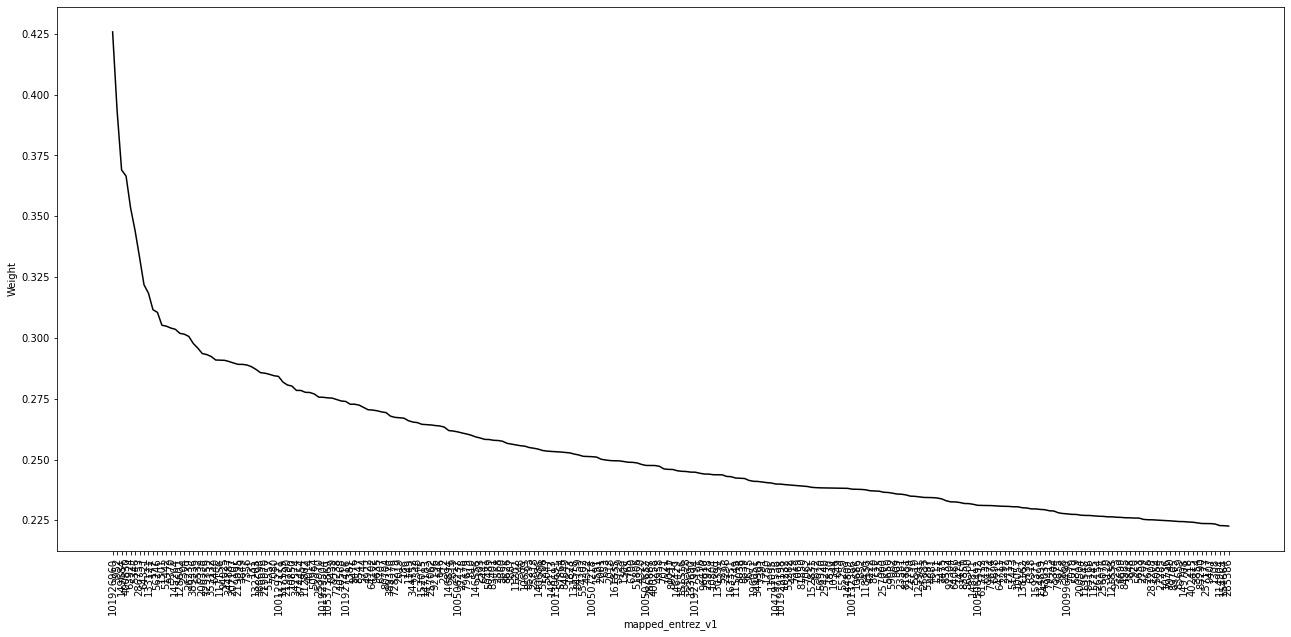

In [247]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(22,10))
sns.lineplot(data=Entrez_Map.head(250), x="mapped_entrez_v1", y='Weight', color='black')
plt.xticks(rotation=90)
plt.show()

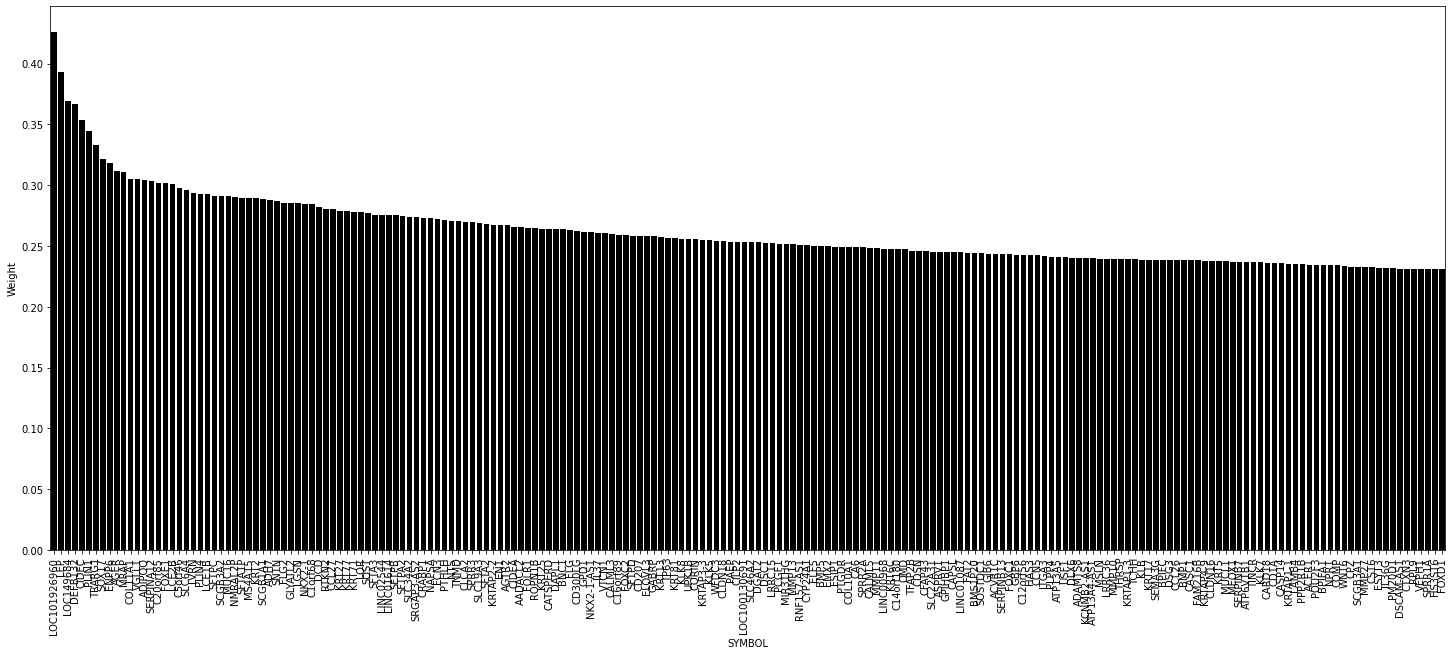

In [248]:
plt.figure(figsize=(25,10))
sns.barplot(data=Entrez_Map.head(200), x="SYMBOL", y='Weight', color='black')
plt.xticks(rotation=90)
plt.show()

In [249]:
Entrez_Map.head(304)['SYMBOL'].to_csv('/home/g0017139/UMCG_Thesis/Working_Code/Results/importgenes.txt', sep=' ', 
                                     header=False, index=False)

In [251]:
print(' '.join(Entrez_Map.head(304)['mapped_entrez_v1'].astype(str).values))

101926960 3952 149684 400830 63924 5346 286753 64321 133121 177 56246 1301 51442 9370 145264 128602 2304 26239 389336 6532 206338 729359 353132 6440 117156 94025 344887 207107 219995 3849 7356 131 132203 388698 219970 51557 7080 100129271 117159 219790 10850 342574 374454 112802 4014 50964 253970 101929504 105373869 6439 729238 10568 101927416 1381 9476 8547 5744 4922 64102 9635 6707 80704 389376 728279 2019 186 1149 344752 2348 152015 147183 257062 92196 646 2312 146894 2819 100506237 27178 79679 810 146556 2303 6441 50489 83401 2568 3860 8626 3887 11202 7348 10699 85293 25818 140686 51208 5047 148113 100130691 57864 84649 1823 131578 84759 554202 4322 100507218 1591 2001 653 2018 161835 5729 1300 765 6700 51806 4320 100507632 286887 400258 4958 7021 1041 80217 146429 151516 338328 133690 101927994 2196 96610 25928 10804 130399 5275 2296 163351 115749 3038 8839 3675 196051 344905 7391 1750 11095 104797538 101929198 10232 55282 4319 7069 81850 7062 152831 3872 56920 254240 1830 10344 6

In [220]:
import os
import re
cluster_df = pd.DataFrame()
directory = '/home/g0017139/UMCG_Thesis/Working_Code/Results/Set2/'
for filename in os.listdir(directory):
    if filename.endswith(".csv"): 
        if 'Clusters' in filename and 'HDDC' in filename:
            try:
                cluster_df[re.findall(r'\d+', filename)[0]] = pd.read_csv(f'{directory}/{filename}', index_col=0).values.ravel()
            except:
                pass

In [222]:
GPL570 = pd.read_parquet("/data/g0017139/GPL570_clean.parquet")
    
GPL570_IDENTIFIER = pd.read_csv("/data/g0017139/Set2/GPL570__Sample_To_TumorType.csv").set_index('GSM_IDENTIFIER')
GPL570_with_type = GPL570.join(GPL570_IDENTIFIER)

In [226]:
cluster_df['Type'] = GPL570_with_type['TYPE'].values

In [231]:
from distinctipy import distinctipy
cluster_colors = distinctipy.get_colors(max(15, len(set(cluster_df['Type']))),
                            colorblind_type='Deuteranomaly', n_attempts=10_000)
cluster_colors = ['#%02x%02x%02x' % tuple((np.array(x)  * 250).astype(int)) for x in cluster_colors]

color_mapper = dict(zip(set(cluster_df['Type']), cluster_colors))

In [236]:
import panel as pn
from bokeh.transform import factor_cmap, factor_mark
from bokeh.plotting import figure, show, output_file, save
from bokeh.models import ColumnDataSource, Dropdown, Select, Panel, Tabs, CustomJS
from bokeh.palettes import Category20
from bokeh.layouts import row, column
from bokeh.transform import cumsum
tabs_pie = []


for column in cluster_df:
    if column != 'Type':
        figures = []
        for group, df_loop in cluster_df.groupby(column):
            size = len(df_loop)
            df_loop = df_loop.groupby('Type').count()[column].reset_index()
            df_loop['angle'] = df_loop[column]/df_loop[column].sum() * 2*np.pi
            df_loop['color'] = [color_mapper[x] for x in df_loop['Type'].values]
            df_loop.columns = [str(x) for x in df_loop.columns] 
            p = figure(width=200, height=150, toolbar_location=None, match_aspect=True,
                       tools="hover", tooltips=f"@Type: @{column}", x_range=(-0.5, 1.0), 
                       title=f'size: {size} {group}')
                       #y_range=(-0.5, 1.0))
            # x_range=(-0.5, 1.0)
            r = p.wedge(x=0, y=1, radius=0.4,
                    start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
                    line_color="white", fill_color='color', source=ColumnDataSource(df_loop))
            # legend_field='Type'
            p.axis.axis_label=None
            p.axis.visible=False
            p.grid.grid_line_color = None
            #p.legend.visible = False 
            figures.append(pn.pane.Bokeh(p))
        # Make the grid
        total = []
        count = len(figures)
        while True:
            if len(figures) > 4 :
                total.append(pn.Row(*figures[0:4]))
                figures = figures[4:]
            else:
                total.append(pn.Row(*figures))
                break
        tabs_pie.append((f'Clusters {column}', pn.Column(*total)))
pie_p = pn.Tabs(*tabs_pie)

In [237]:
pn.extension()
pie_p

Tabs
    [0] Column
        [0] Row
            [0] Bokeh(Figure)
            [1] Bokeh(Figure)
            [2] Bokeh(Figure)
            [3] Bokeh(Figure)
        [1] Row
            [0] Bokeh(Figure)
            [1] Bokeh(Figure)
            [2] Bokeh(Figure)
            [3] Bokeh(Figure)
        [2] Row
            [0] Bokeh(Figure)
    [1] Column
        [0] Row
            [0] Bokeh(Figure)
            [1] Bokeh(Figure)
            [2] Bokeh(Figure)
            [3] Bokeh(Figure)
        [1] Row
            [0] Bokeh(Figure)
    [2] Column
        [0] Row
            [0] Bokeh(Figure)
            [1] Bokeh(Figure)
            [2] Bokeh(Figure)
            [3] Bokeh(Figure)
        [1] Row
            [0] Bokeh(Figure)
            [1] Bokeh(Figure)
            [2] Bokeh(Figure)
            [3] Bokeh(Figure)
    [3] Column
        [0] Row
            [0] Bokeh(Figure)
            [1] Bokeh(Figure)
            [2] Bokeh(Figure)
            [3] Bokeh(Figure)
        [1] Row
            [0] Bokeh(Figure)
            [1] Bokeh(Figure)
    [4] Column
        [0] Row
            [0] Bokeh(Figure)
            [1] Bokeh(Figure)
    [5] Column
        [0] Row
            [0] Bokeh(Figure)
            [1] Bokeh(Figure)
            [2] Bokeh(Figure)
            [3] Bokeh(Figure)
    [6] Column
        [0] Row
            [0] Bokeh(Figure)
            [1] Bokeh(Figure)
            [2] Bokeh(Figure)
            [3] Bokeh(Figure)
        [1] Row
            [0] Bokeh(Figure)
            [1] Bokeh(Figure)
            [2] Bokeh(Figure)
            [3] Bokeh(Figure)
        [2] Row
            [0] Bokeh(Figure)
            [1] Bokeh(Figure)
    [7] Column
        [0] Row
            [0] Bokeh(Figure)
            [1] Bokeh(Figure)
            [2] Bokeh(Figure)
            [3] Bokeh(Figure)
        [1] Row
            [0] Bokeh(Figure)
            [1] Bokeh(Figure)
            [2] Bokeh(Figure)
    [8] Column
        [0] Row
            [0] Bokeh(Figure)
            [1] Bokeh(Figure)
            [2] Bokeh(Figure)